<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/deepLearnRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mohansacharya_graduate_admissions_path = kagglehub.dataset_download('mohansacharya/graduate-admissions')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [3]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [6]:
df.drop(columns=['Serial No.'],inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
#we will use minmax scaling here because we do know the upper bound and lowerbound of values
df.duplicated().sum()


np.int64(0)

In [13]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
x_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Dense(7,activation='relu',input_dim  = 7))
model.add(Dense(7,activation='tanh'))
model.add(Dense(7,activation='tanh'))
model.add(Dense(7,activation='tanh'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232 (928.00 B)

 Trainable params: 232 (928.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss = 'mean_squared_error',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=200, batch_size=32,validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0000e+00 - loss: 0.5453 - val_accuracy: 0.0000e+00 - val_loss: 0.2400
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.2168 - val_accuracy: 0.0000e+00 - val_loss: 0.0641
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0545 - val_accuracy: 0.0000e+00 - val_loss: 0.0347
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0259 - val_accuracy: 0.0000e+00 - val_loss: 0.0414
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0280 - val_accuracy: 0.0000e+00 - val_loss: 0.0380
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0253 - val_accuracy: 0.0000e+00 - val_loss: 0.0311
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0209 - val_accuracy: 0.0000e+00 - val_loss: 0.0279
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

In [31]:
y_pred = model.predict(x_test_scaled)
y_pred

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.8869777 ],
       [0.7908912 ],
       [0.5904731 ],
       [0.71555907],
       [0.8158753 ],
       [0.8639675 ],
       [0.42969823],
       [0.6317446 ],
       [0.8104726 ],
       [0.7953338 ],
       [0.7554347 ],
       [0.7415824 ],
       [0.6696408 ],
       [0.9096632 ],
       [0.8162633 ],
       [0.47820723],
       [0.8465921 ],
       [0.59311557],
       [0.5030336 ],
       [0.5602521 ],
       [0.67297703],
       [0.5427162 ],
       [0.735629  ],
       [0.8039466 ],
       [0.77780724],
       [0.58357686],
       [0.91450924],
       [0.8590683 ],
       [0.64764553],
       [0.7633463 ],
       [0.56303954],
       [0.7443057 ],
       [0.5097105 ],
       [0.85301083],
       [0.68250215],
       [0.7471834 ],
       [0.53285754],
       [0.9258061 ],
       [0.66088897],
       [0.7444319 ],
       [0.93585813],
       [0.58150774],
       [0.67495435],
       [0.86509943],
       [0.8992914 ],
       [0.6003651 ],
       [0.9221206 ],
       [0.844

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7698020866230524

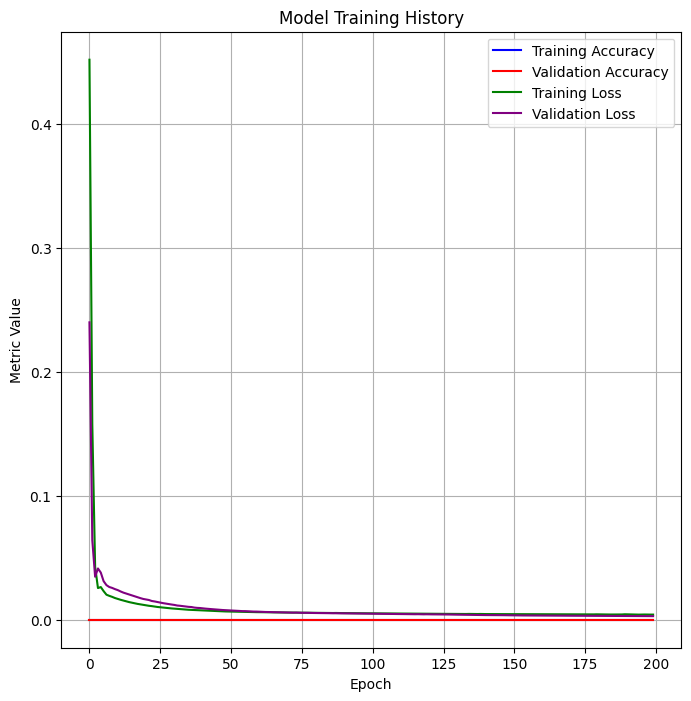

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.plot(history.history['loss'], color='green', label='Training Loss')
plt.plot(history.history['val_loss'], color='purple', label='Validation Loss')

plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()